In [76]:
import tensorflow as tf

In [77]:
image = tf.io.read_file("assets/ganesh.jpg")

# 1 channel means grey gradients, 3 for RGB
image = tf.io.decode_jpeg(image, channels = 1)

image = tf.image.resize(image, size = [300, 300])

image.shape

TensorShape([300, 300, 1])

In [78]:
# remove dimensions of size 1 from the shape
image_array = tf.squeeze(image)

image_array.shape

TensorShape([300, 300])

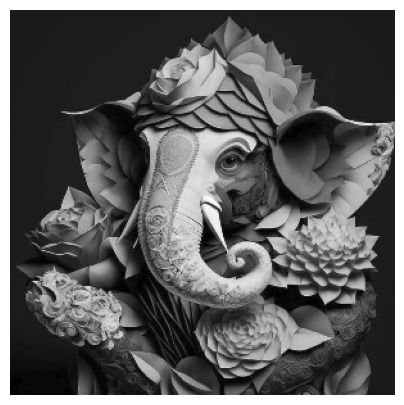

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.imshow(image_array, cmap = "grey")
plt.axis("off")
plt.show()

Convert image dtype to float32 if it's not

In [80]:
image = tf.image.convert_image_dtype(image, dtype = tf.float32)

Insert dimension of length 1 in index 0

In [81]:
image = tf.expand_dims(image, axis = 0)

image.shape

TensorShape([1, 300, 300, 1])

Edge Detecting with Laplacian Operator

In [82]:
kernel = tf.constant([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1],
])

kernel.shape

TensorShape([3, 3])

Reshape filter shape to fit the multiply process

In [83]:
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

kernel.shape

TensorShape([3, 3, 1, 1])

Convert kernel dtype to float32

In [84]:
kernel = tf.cast(kernel, dtype = tf.float32)

Multiply image with the kernel, sum the results

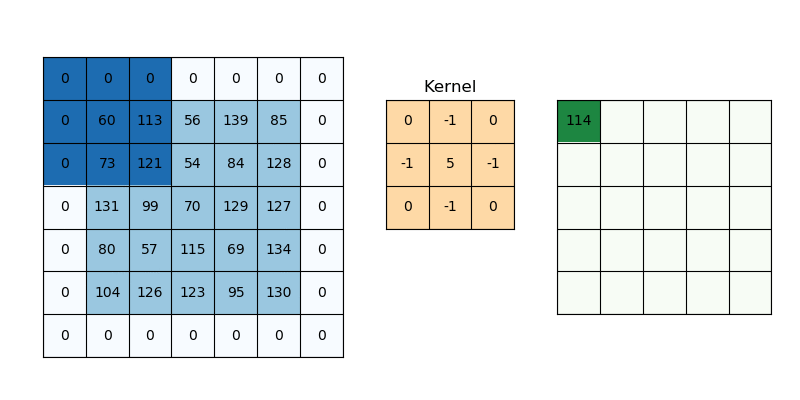

Convolutional Layer (Activation Map)

In [85]:
# move the filters by 1 stride
# try to pad the image evenly left and right with 0s, to not drop any features while striding
convolutional_output = tf.nn.conv2d(input = image, filters = kernel, strides = 1, padding = "SAME")
convolutional_output_array = tf.squeeze(convolutional_output)

convolutional_activiation = tf.nn.relu(convolutional_output)
convolutional_activiation_array = tf.squeeze(convolutional_activiation)

Pooling by 2*2 filter and (2, 2) strides

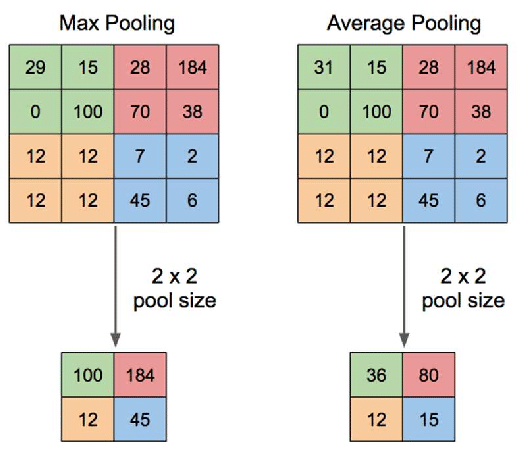

In [86]:
pooling_max = tf.nn.pool(input = convolutional_activiation,
                        window_shape = (2, 2),
                        pooling_type = "MAX",
                        strides = (2, 2),
                        padding = "SAME"
                      )
pooling_max_array = tf.squeeze(pooling_max)

pooling_avg = tf.nn.pool(input = convolutional_activiation,
                        window_shape = (2, 2),
                        pooling_type = "AVG",
                        strides = (2, 2),
                        padding = "SAME"
                      )
pooling_avg_array = tf.squeeze(pooling_avg)

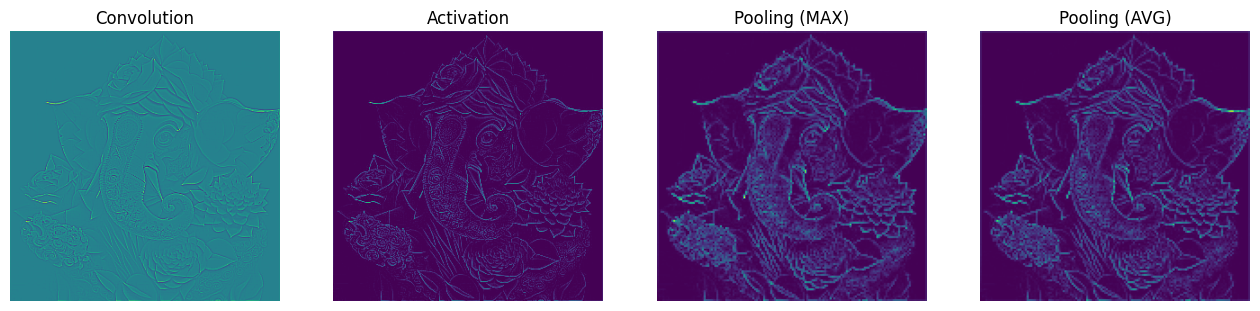

In [87]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 4, 1)
plt.title("Convolution")
plt.imshow(convolutional_output_array)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Activation")
plt.imshow(convolutional_activiation_array)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Pooling (MAX)")
plt.imshow(pooling_max_array)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Pooling (AVG)")
plt.imshow(pooling_avg_array)
plt.axis("off")

plt.show()